Import necessary packages: Numpy, Pandas, matplotlib

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [ ]:
path_to_train = '/content/drive/My Drive/ML_Class_2020/KNN/zip.train'
path_to_test = '/content/drive/My Drive/ML_Class_2020/KNN/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 0, y_train == 1)]
y_train = y_train[np.logical_or(y_train == 0, y_train == 1)]

X_test = X_test[np.logical_or(y_test == 0, y_test == 1)]
y_test = y_test[np.logical_or(y_test == 0, y_test == 1)]

In [ ]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


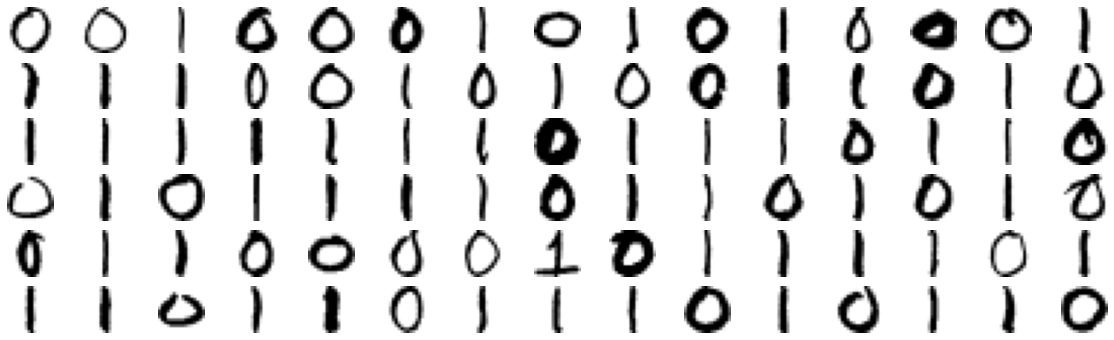

In [ ]:
show_numbers(X_train)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [ ]:
print(X_train.shape)
matrix = np.arange(2199)
matrix = np.transpose(np.broadcast_to(np.transpose(matrix), (2199,2199))[:256,:])
matrix = matrix*(2*np.ones((2199,256)))
print(matrix.shape, matrix)
#x = np.transpose(np.arange((2199,2199))[:256])*np.ones((2199,256))

#matrix = np.broadcast_to(X_train[:,0], X_train.shape)
print(matrix)
print(np.mean(np.array([[0.5,0.4],[0.4,0.6]]), axis=0))


(2199, 256)
(2199, 256) [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 2.000e+00 2.000e+00]
 [4.000e+00 4.000e+00 4.000e+00 ... 4.000e+00 4.000e+00 4.000e+00]
 ...
 [4.392e+03 4.392e+03 4.392e+03 ... 4.392e+03 4.392e+03 4.392e+03]
 [4.394e+03 4.394e+03 4.394e+03 ... 4.394e+03 4.394e+03 4.394e+03]
 [4.396e+03 4.396e+03 4.396e+03 ... 4.396e+03 4.396e+03 4.396e+03]]
[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 2.000e+00 2.000e+00]
 [4.000e+00 4.000e+00 4.000e+00 ... 4.000e+00 4.000e+00 4.000e+00]
 ...
 [4.392e+03 4.392e+03 4.392e+03 ... 4.392e+03 4.392e+03 4.392e+03]
 [4.394e+03 4.394e+03 4.394e+03 ... 4.394e+03 4.394e+03 4.394e+03]
 [4.396e+03 4.396e+03 4.396e+03 ... 4.396e+03 4.396e+03 4.396e+03]]
[0.45 0.5 ]


In [ ]:
# Logistic Regression
def sigmoid(X):
  return 1/(1 + np.exp(-X))
  
def sigmoid_prime(X):
  return np.exp(-X)/(1+np.exp(-X))**2

def CE(X,Y):
  return -Y*np.log(X) - (1 - Y)*np.log(1 - X)

def CE_prime(X,Y):
  return (1 - Y)/(1 - X) - Y/X

def MSE(X,Y):
  return 


class LogisticRegression():
  def __init__(self):
    # initialize weight, bias and learning rate
    self.w = np.random.randn(X_train.shape[1])
    self.b = np.random.randn(1)
    self.lr = 0.05
  
  def forward(self, X):
    # z = X^T w + b
    linear_out = np.sum(X*self.w, axis=1) + self.b*np.ones(X.shape[0])
    activation = sigmoid(linear_out)
    return activation, linear_out, X

  def loss(self, activation, target):
    return CE(activation, target)

  def gradientDescent(self, activation, linear_out, X, Y):
    backward = CE_prime(activation, Y)*sigmoid_prime(linear_out)
    broadcasted_backward = np.transpose(np.broadcast_to(backward, (X.shape[0],X.shape[0]))[:256])
    weight_gradient = np.mean(broadcasted_backward*X, axis=0)
    bias_gradient = np.mean(backward*np.ones(X.shape[0]), axis=0)

    # apply gradient descent
    self.w = self.w - self.lr*weight_gradient
    self.b = self.b - self.lr*bias_gradient

  def get_label(self, activation):
    return np.round(activation)


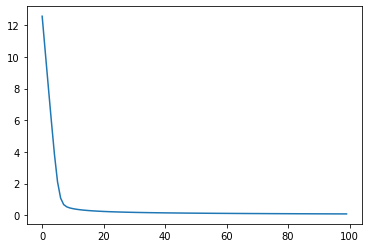

0.9614767255216693


In [ ]:
model = LogisticRegression()
episodes = 100
losses = []

for episode in range(episodes):
  output = model.forward(X_train)
  activation = output[0]
  avg_loss = np.mean(model.loss(activation, y_train), axis=0)
  losses.append(avg_loss)

  # gradient descent
  model.gradientDescent(*output, y_train)

plt.plot(losses)
plt.show()

output_test = model.forward(X_test)
accuracy = np.mean(model.get_label(output_test[0]) == y_test)
print(accuracy)

Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?